**Exploratory Data Analysis (EDA) for provided dataset **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import json

# Open the JSON file
with open('part_1.json', 'r') as file:
    data = json.load(file)

# Get the column names (keys of the first dictionary)
column_names = list(data[0].keys())

# Print the column names
print(column_names)

# Print the first 5 rows of data
for i in range(min(5, len(data))):
    print(data[i])

['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed']
{'id': '0704.0001', 'submitter': 'Pavel Nadolsky', 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan", 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies', 'comments': '37 pages, 15 figures; published version', 'journal-ref': 'Phys.Rev.D76:013009,2007', 'doi': '10.1103/PhysRevD.76.013009', 'report-no': 'ANL-HEP-PR-07-12', 'categories': 'hep-ph', 'license': None, 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-lea

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import json

# Open the JSON file and load the data
with open('part_1.json', 'r') as file:
    json_data = json.load(file)

# Limit data to the first 10,000 rows
limited_data = json_data[:10000]

# Convert the limited JSON data to a DataFrame
data = pd.DataFrame(limited_data)

# Use describe() to get summary statistics
print(data.describe().T)

                count unique  \
id              10000  10000   
submitter       10000   8031   
authors         10000   9417   
title           10000   9998   
comments         8862   6798   
journal-ref      5429   5425   
doi              6359   6353   
report-no         882    878   
categories      10000   1455   
license           710      7   
abstract        10000   9991   
versions        10000   9995   
update_date     10000   1325   
authors_parsed  10000   9371   

                                                              top  freq  
id                                                      0704.0001     1  
submitter                                       Tshilidzi Marwala    36  
authors                                             Yusuke Sasano    18  
title           Metal and molecule cooling in simulations of s...     2  
comments                                       4 pages, 4 figures    71  
journal-ref     12th World Congress in Mechanism and Machine S...     2  
d

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')



cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')
Numerical Variables:
[]


EDA Univariate Analysis

In [9]:
# Frequency Distribution
for col in cat_cols:
    print(f"Column: {col}")
    print(f"Value Counts:")
    print(data[col].value_counts())
    print("\n")

Column: id
Value Counts:
0704.0001    1
0705.2668    1
0705.2661    1
0705.2662    1
0705.2663    1
            ..
0704.3334    1
0704.3335    1
0704.3336    1
0704.3337    1
0706.1313    1
Name: id, Length: 10000, dtype: int64


Column: submitter
Value Counts:
Tshilidzi Marwala    36
Damien Chablat       32
Yusuke Sasano        18
Jerome Darmont       12
Matthias Brust R.    11
                     ..
Jegor Uglov Mr        1
Mikhail Danilov       1
Bobroff               1
Junghoon Kim          1
Susanne Reffert       1
Name: submitter, Length: 8031, dtype: int64


Column: authors
Value Counts:
Yusuke Sasano                                          18
M. Ibison                                               8
The BABAR Collaboration, B. Aubert, et al               7
Kerry M. Soileau                                        7
D0 Collaboration, V. Abazov, et al                      6
                                                       ..
Daniel Juteau                                     

In [10]:
#Missing Value (probably should be done before data clearning)

for col in cat_cols:
    print(f"Column: {col}")
    print(f"Number of missing values: {data[col].isnull().sum()}")
    print("\n")


Column: id
Number of missing values: 0


Column: submitter
Number of missing values: 0


Column: authors
Number of missing values: 0


Column: title
Number of missing values: 0


Column: comments
Number of missing values: 1138


Column: journal-ref
Number of missing values: 4571


Column: doi
Number of missing values: 3641


Column: report-no
Number of missing values: 9118


Column: categories
Number of missing values: 0


Column: license
Number of missing values: 9290


Column: abstract
Number of missing values: 0


Column: versions
Number of missing values: 0


Column: update_date
Number of missing values: 0


Column: authors_parsed
Number of missing values: 0




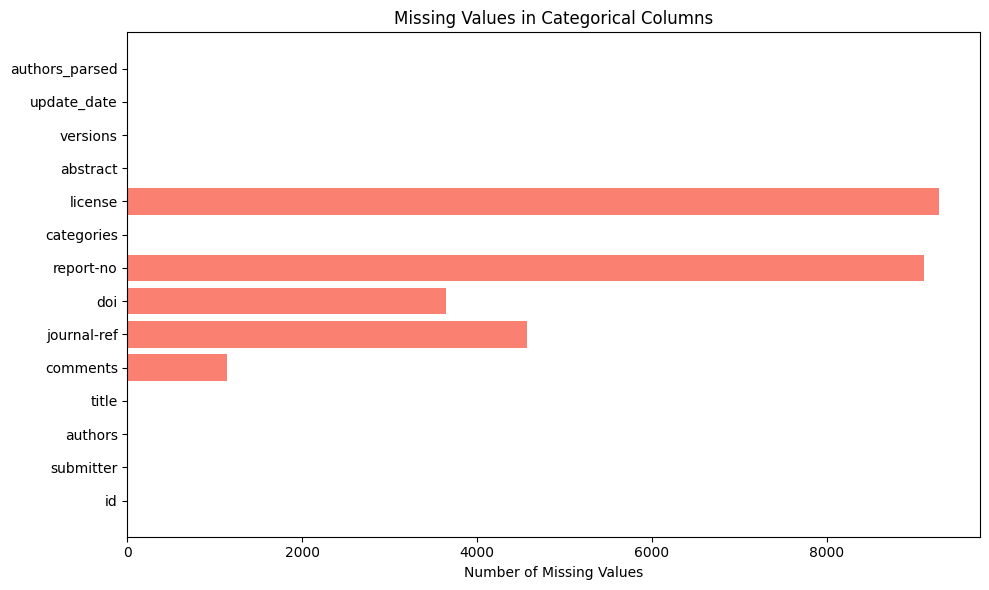

In [15]:
# Calculate missing values for categorical columns
# Initialize lists to store column names and missing value counts
columns = []
missing_values = []

for col in cat_cols:
    columns.append(col)
    missing_values.append(data[col].isnull().sum())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(columns, missing_values, color='salmon')

# Customizing the plot
plt.xlabel('Number of Missing Values')
plt.title('Missing Values in Categorical Columns')
plt.tight_layout()

# Show plot
plt.show()

In [11]:
#checking the value counts and exploring the unique values in each categorical column:

import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
    print(f"Column: {col}")
    print(f"Value Counts:")
    print(data[col].value_counts())
    print("\n")


Column: id
Value Counts:
0704.0001    1
0705.2668    1
0705.2661    1
0705.2662    1
0705.2663    1
            ..
0704.3334    1
0704.3335    1
0704.3336    1
0704.3337    1
0706.1313    1
Name: id, Length: 10000, dtype: int64


Column: submitter
Value Counts:
Tshilidzi Marwala    36
Damien Chablat       32
Yusuke Sasano        18
Jerome Darmont       12
Matthias Brust R.    11
                     ..
Jegor Uglov Mr        1
Mikhail Danilov       1
Bobroff               1
Junghoon Kim          1
Susanne Reffert       1
Name: submitter, Length: 8031, dtype: int64


Column: authors
Value Counts:
Yusuke Sasano                                          18
M. Ibison                                               8
The BABAR Collaboration, B. Aubert, et al               7
Kerry M. Soileau                                        7
D0 Collaboration, V. Abazov, et al                      6
                                                       ..
Daniel Juteau                                     

In [12]:
# Convert the data into a DataFrame.  EDA Bivariate Analysis

df = pd.DataFrame(data)

# Assuming 'update_date' is in datetime format, if not, convert it:
df['update_date'] = pd.to_datetime(df['update_date'])

# Bivariate analysis between 'categories' and 'update_date'
bivariate_analysis = df[['categories', 'update_date']]

# Basic analysis - counts of each category
category_counts = bivariate_analysis['categories'].value_counts()

# Summary statistics of update_date for each category
category_date_summary = bivariate_analysis.groupby('categories')['update_date'].describe()

print("Counts of each category:")
print(category_counts)
print("\nSummary statistics of update_date for each category:")
print(category_date_summary)

Counts of each category:
astro-ph                                     1719
hep-ph                                        475
quant-ph                                      466
hep-th                                        427
gr-qc                                         218
                                             ... 
math.DS cs.DM math.NT                           1
cs.CC math.CO                                   1
physics.optics cond-mat.mes-hall quant-ph       1
math.OA math.GN math.GR math.KT                 1
q-fin.PR math-ph math.MP                        1
Name: categories, Length: 1455, dtype: int64

Summary statistics of update_date for each category:
                                                   count unique  \
categories                                                        
astro-ph                                            1719    150   
astro-ph astro-ph.CO                                   1      1   
astro-ph astro-ph.CO astro-ph.HE astro-ph.IM           1  